In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
# LinearRegression from sklearn.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pickle as pk


**My Mission**

Is to make it safety equipment affordable and reliable within the informal sector







A regression model that predicts the sales of a paticular product at a particular store.
Algorithms

linear regression model

decision trees

random forest

Data source  https://www.kaggle.com/datasets/devashish0507/big-mart-sales-prediction/data

In [244]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [245]:
path = '/content/drive/MyDrive/Train.csv'
data = pd.read_csv(path)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [246]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [248]:
data.apply(lambda x: len(x.unique()))

,0
Item_Identifier,1559
Item_Weight,416
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,4
Outlet_Location_Type,3


**Data Processing**

In [249]:
#checking for null values

data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [250]:
#attributes without numerical values

non_int = []

for i in data.dtypes.index:
  if data.dtypes[i] == 'object':
    non_int.append(i)

non_int

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [251]:
non_int.remove('Item_Identifier')
non_int.remove('Outlet_Identifier')

In [252]:
#showing non-int colums
for colum in non_int:
  print(colum)
  print(data[colum].value_counts())
  print()

Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Outlet_Type
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2   

In [253]:
item_weight_mean = data.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [254]:
miss_bool = data['Item_Weight'].isnull()
miss_bool

,Item_Weight
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [255]:
# Impute missing weights based on Item_Identifier
data.loc[miss_bool & data['Item_Identifier'].isin(item_weight_mean.index), 'Item_Weight'] = \
    data.loc[miss_bool & data['Item_Identifier'].isin(item_weight_mean.index), 'Item_Identifier'].map(item_weight_mean['Item_Weight'])

# Impute remaining missing weights with the overall mean
data.loc[miss_bool & ~data['Item_Identifier'].isin(item_weight_mean.index), 'Item_Weight'] = \
    np.mean(data['Item_Weight'])


In [256]:
data['Item_Weight'].isnull().sum()

0

In [257]:

outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [258]:
miss_bool = data['Outlet_Size'].isnull()
data.loc[miss_bool, 'Outlet_Size'] = data.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [259]:
data['Outlet_Size'].isnull().sum()


0

checking for zeros in Iterm_Visibility

In [260]:
sum(data['Item_Visibility']==0)


526

Replacing zeros with the mean

In [261]:

data['Item_Visibility'] = data['Item_Visibility'].replace(0, data['Item_Visibility'].mean())


In [262]:
sum(data['Item_Visibility']==0)

0

Combing item fat content

In [263]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


New Atributes

In [264]:
data['New_Item_Type'] = data['Item_Identifier'].str[:2]
data['New_Item_Type']

,New_Item_Type
0,FD
1,DR
2,FD
3,FD
4,NC
...,...
8518,FD
8519,FD
8520,NC
8521,FD


In [265]:
data['New_Item_Type'] = data['New_Item_Type'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})


In [266]:
data.loc[data['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3918
Regular,3006
Non-Edible,1599


Since the data was collected in 2013. i will simplify the Outlet Establishment Year

In [267]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years']

,Outlet_Years
0,14
1,4
2,14
3,15
4,26
...,...
8518,26
8519,11
8520,9
8521,4


In [268]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


**Coorelation**

<Axes: >

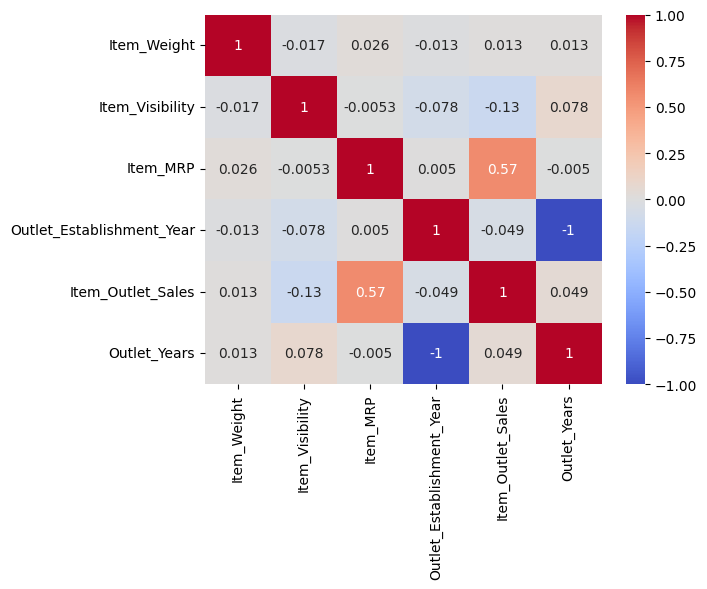

In [269]:
#taking only numeric varibles
num_data = data.select_dtypes(include='number')
corelation = num_data.corr()
sns.heatmap(corelation,annot=True, cmap='coolwarm')

In [270]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.930,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,Food,11
8520,NCJ29,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4


Seems like corelation does not clearly give me the reletionship between the variables so i will use **ANOVA** instead

In [271]:
import pandas as pd
from scipy import stats

# Assuming `data` is your DataFrame

# List of categorical columns you want to perform ANOVA on
categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
                       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type', 'Outlet_Years']

# List of numerical columns for correlation or regression
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

# Perform ANOVA for categorical variables
anova_results = {}
for column in categorical_columns:
    # Group the data by the categorical variable and apply ANOVA
    data_grouped = data.groupby(column)['Item_Outlet_Sales']

    # Perform the one-way ANOVA
    groups = [group for name, group in data_grouped]
    f_stat, p_value = stats.f_oneway(*groups)

    # Store the results in the dictionary
    anova_results[column] = {'F-statistic': f_stat, 'p-value': p_value}

# Display ANOVA results
print("ANOVA Results:")
for col, result in anova_results.items():
    print(f"ANOVA for {col}: F-statistic = {result['F-statistic']}, p-value = {result['p-value']}")

# Perform correlation for numerical variables
print("\nCorrelation Results (for numerical variables with Item_Outlet_Sales):")
for column in numerical_columns:
    correlation = data[column].corr(data['Item_Outlet_Sales'])
    print(f"Correlation between {column} and Item_Outlet_Sales: {correlation}")


ANOVA Results:
ANOVA for Item_Identifier: F-statistic = 3.3314460262614625, p-value = 1.2735307576432533e-252
ANOVA for Item_Fat_Content: F-statistic = 1.5800667571426181, p-value = 0.2060216950157096
ANOVA for Item_Type: F-statistic = 2.7006532875210416, p-value = 0.00038843993766501125
ANOVA for Outlet_Identifier: F-statistic = 300.0791353284904, p-value = 0.0
ANOVA for Outlet_Size: F-statistic = 213.69096479853792, p-value = 2.8042418281729364e-91
ANOVA for Outlet_Location_Type: F-statistic = 53.947739874560675, p-value = 5.2228172988842975e-24
ANOVA for Outlet_Type: F-statistic = 894.6500119018012, p-value = 0.0
ANOVA for New_Item_Type: F-statistic = 6.278765679145161, p-value = 0.0018844050713309338
ANOVA for Outlet_Years: F-statistic = 102.57345213722812, p-value = 6.744877880160888e-164

Correlation Results (for numerical variables with Item_Outlet_Sales):
Correlation between Item_Weight and Item_Outlet_Sales: 0.013164576836245846
Correlation between Item_Visibility and Item_Out

Most variables, including **Item_Identifier, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, and Outlet_Years, have a significant effect on Item_Outlet_Sales**.


**Item_Fat_Content** and **Item_Visibility** were found to not have a significant effect.
The interaction between Outlet_Years and Item_Type was not found to significantly affect sales.

In [272]:
print(data.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'New_Item_Type', 'Outlet_Years'],
      dtype='object')


**Label Encoding**

In [273]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
non_int = ['Item_Identifier', 'Outlet_Identifier', 'Outlet_Location_Type','Item_Type', 'Outlet_Type','Outlet_Size', 'New_Item_Type']
for col in non_int:
    data[col] = le.fit_transform(data[col])

**Onehot Encoding**

In [274]:
df = pd.get_dummies(data, columns=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type','Outlet_Size', 'New_Item_Type'])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,156,9.30,Low Fat,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1,14,9
1,8,5.92,Regular,0.019278,14,48.2692,3,2009,1,2,2,443.4228,0,4,3
2,662,17.50,Low Fat,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1,14,9
3,1121,19.20,Regular,0.066132,6,182.0950,0,1998,2,2,0,732.3800,1,15,0
4,1297,8.93,Non-Edible,0.066132,9,53.8614,1,1987,0,2,1,994.7052,2,26,1


In [275]:
print(data.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'New_Item_Type', 'Outlet_Years',
       'Outlet'],
      dtype='object')










**MODEL TRAINING**

In [276]:
X = data.drop(columns=['Outlet_Establishment_Year','Item_Type','Item_Weight','Item_Fat_Content', 'Item_Visibility', 'Item_Identifier','Outlet', 'Outlet_Identifier', 'Item_Outlet_Sales'])
Y = data['Item_Outlet_Sales']

In [277]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, )
X_train

,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years
6542,133.3284,2,1,1,1,6
7742,35.6874,0,2,1,2,26
1367,233.5984,2,1,1,1,11
98,149.9708,1,2,3,2,28
2112,182.6950,2,1,1,1,11
...,...,...,...,...,...,...
5860,157.5262,2,0,0,1,28
3197,199.5742,1,2,3,1,28
1635,150.7392,1,0,1,1,14
5558,266.5884,2,1,1,2,9


In [278]:
print(f"Shape of X array: {X.shape}")
print(f"Shape of Y array: {Y.shape}")

Shape of X array: (8523, 6)
Shape of Y array: (8523,)


In [279]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (6818, 6)
X_test shape: (1705, 6)
Y_train shape: (6818,)
Y_test shape: (1705,)


In [280]:
Y_test.head()

,Item_Outlet_Sales
6204,677.1186
2699,3621.9520
7160,1318.2840
6616,2111.9176
1642,211.7244


**LinearRegression Algorithm**

In [281]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [282]:
with open('model.pkl', 'wb') as file:
    pk.dump(model, file)

<Axes: title={'center': 'Model Coefficients'}>

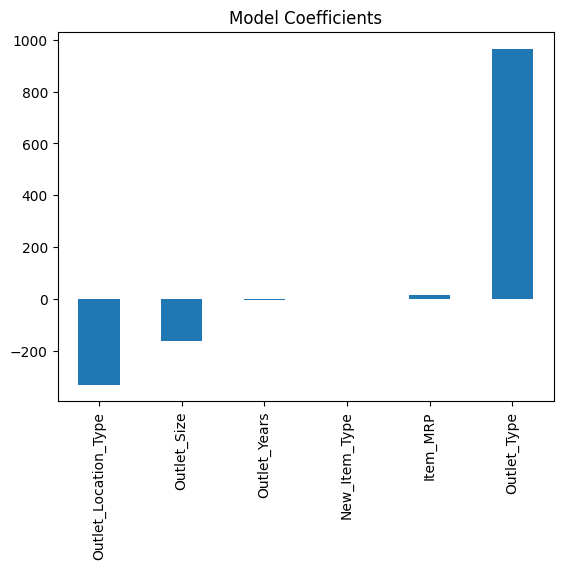

In [283]:
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

In [284]:
Y_pred = model.predict(X_test)

In [285]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(Y_test, Y_pred):
    # Calculating Mean Absolute Error (MAE)
    mae = mean_absolute_error(Y_test, Y_pred)
    print(f'Mean Absolute Error (MAE): {mae}')

    # Calculating Mean Squared Error (MSE)
    mse = mean_squared_error(Y_test, Y_pred)
    print(f'Mean Squared Error (MSE): {mse}')

    # Calculating R-squared
    r2 = r2_score(Y_test, Y_pred)
    print(f'R-squared: {r2}')

evaluate(Y_test, Y_pred)


Mean Absolute Error (MAE): 908.8063378896428
Mean Squared Error (MSE): 1501557.6044327593
R-squared: 0.5114153400881573


In [286]:
Y_test


,Item_Outlet_Sales
6204,677.1186
2699,3621.9520
7160,1318.2840
6616,2111.9176
1642,211.7244
...,...
3606,4673.9160
2171,4958.8784
4428,575.2512
1866,1328.2710


In [287]:
print(Y_pred[:5])

[2528.34117138 3178.45037838 1070.85542104 2188.89692733   99.53075535]


**Decision Tree model**

In [288]:
dModel = DecisionTreeRegressor()
dModel.fit(X_train, Y_train.ravel())

<ipython-input-288-3d797d187068>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  dModel.fit(X_train, Y_train.ravel())


DecisionTreeRegressor()

**RMSE**

In [289]:
W_pred = dModel.predict(X_test)
evaluate(Y_test, W_pred)

Mean Absolute Error (MAE): 1032.4000234604105
Mean Squared Error (MSE): 2283310.6668157163
R-squared: 0.2570444434992727


In [290]:
print(W_pred[:5])

[ 447.4176 3848.324  1581.9408 1444.1202  542.627 ]


In [291]:
Y_test.head()

,Item_Outlet_Sales
6204,677.1186
2699,3621.9520
7160,1318.2840
6616,2111.9176
1642,211.7244


**Random Forest model**

In [292]:
Rmodel = RandomForestRegressor()
Rmodel.fit(X_train, Y_train.ravel())

<ipython-input-292-9c8561c4901d>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  Rmodel.fit(X_train, Y_train.ravel())


RandomForestRegressor()

In [293]:
Z_pred = dModel.predict(X_test)
evaluate(Y_test, Z_pred)

Mean Absolute Error (MAE): 1032.4000234604105
Mean Squared Error (MSE): 2283310.6668157163
R-squared: 0.2570444434992727
